# CORDIS

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data loading and preprocessing

In [5]:
# Load data

columns_dates = ['startDate','endDate']

cordish2020 = pd.read_csv("data/cordis/cordis-h2020projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp7 = pd.read_csv("data/cordis/cordis-fp7projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp6 = pd.read_csv("data/cordis/cordis-fp6projects.csv",sep=";",decimal=",",parse_dates=columns_dates)

# Manual preprocessing...

cordisfp6 = cordisfp6.drop(columns=['totalCost'])
cordisfp6 = cordisfp6.drop(columns=['ecMaxContribution'])
totalCostFP6 = pd.read_csv("data/cordis/totalCostFP6.csv",sep=";",decimal=".")
cordisfp6['totalCost'] = totalCostFP6
ecMaxContributionFP6 = pd.read_csv("data/cordis/ecMaxContributionFP6.csv",sep=";",decimal=".")
cordisfp6['ecMaxContribution'] = ecMaxContributionFP6

In [6]:
# Shapes
print("H2020 (2014-2020): ",cordish2020.shape)
print("FP7 (2007-2013): ",cordisfp7.shape)
print("FP6 (2002-2006): ",cordisfp6.shape)

H2020 (2014-2020):  (32161, 21)
FP7 (2007-2013):  (25778, 21)
FP6 (2002-2006):  (10082, 21)


In [7]:
# Check duplicates
print(cordish2020.drop_duplicates().shape)
print(cordisfp7.drop_duplicates().shape)
print(cordisfp6.drop_duplicates().shape)

(32161, 21)
(25778, 21)
(10082, 21)


In [8]:
# Append data
cordis = cordish2020.append(cordisfp7)
cordis = cordis.append(cordisfp6)
print('CORDIS original dataframe shape: ',cordis.shape)
cordis.head()

CORDIS original dataframe shape:  (68021, 21)


,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,197163,672890,TailorFit,CLOSED,H2020-EU.2.3.1.;H2020-EU.2.1.2.,NMP-25-2014-1,H2020,TailorFit; The Integrated “made to measure” wo...,2015-06-01,2015-11-30,...,'The project targets all luxury fashion firms ...,71429.00,50000.00,H2020-SMEINST-1-2014,SME-1,CREA SOLUTION SRL,IT,NaN,NaN,NaN
1,193257,633814,PEGASUS,CLOSED,H2020-EU.3.2.,ISIB-01-2014,H2020,Public Ecosystem Goods And Services from land ...,2015-03-01,2018-02-28,...,EU's agricultural and forestry land provides a...,3007800.00,2977525.00,H2020-ISIB-2014-2,RIA,"INSTITUTE FOR EUROPEAN ENVIRONMENTAL POLICY, L...",UK,MITTETULUNDUSUHING OKOLOOGILISTE TEHNOLOOGIATE...,EE;FR;NL;AT;PT;UK;CZ;IT;DE;SI;BE,NaN
2,213807,785419,LABOR,SIGNED,H2020-EU.3.4.5.4.,JTI-CS2-2017-CFP06-AIR-02-49,H2020,Lean robotized AssemBly and cOntrol of composi...,2018-03-01,2021-02-28,...,"According to the Global Market Forecast, there...",2509375.00,1995062.50,H2020-CS2-CFP06-2017-01,CS2-IA,AEA s.r.l.,IT,UNIVERSITA DEGLI STUDI DI SALERNO;UNIVERSITA D...,IT,NaN
3,205543,721362,ZAero,CLOSED,H2020-EU.2.1.5.1.,FOF-03-2016,H2020,Zero-defect manufacturing of composite parts i...,2016-10-01,2019-09-30,...,In the aerospace industry very high quality st...,4124143.75,3548206.01,H2020-FOF-2016,IA,PROFACTOR GMBH,AT,M TORRES DISEÑOS INDUSTRIALES SA;FUNDACION PAR...,ES;FR;DE,NaN
4,229365,861924,SustInAfrica,SIGNED,H2020-EU.3.2.1.1.,SFS-35-2019-2020,H2020,Sustainable intensification of food production...,2020-09-01,2025-08-31,...,Large areas of agricultural land in W. and N. ...,6997318.74,6997318.74,H2020-SFS-2019-2,RIA,LUONNONVARAKESKUS,FI,GORTA;FCIENCIAS.ID - ASSOCIACAO PARA A INVESTI...,IE;PT;GH;BF;TN;NE;EG;AT;IT;DE,NaN


In [9]:
print('CORDIS original dataframe column names: ',list(cordis.columns))

CORDIS original dataframe column names:  ['rcn', 'id', 'acronym', 'status', 'programme', 'topics', 'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl', 'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme', 'coordinator', 'coordinatorCountry', 'participants', 'participantCountries', 'subjects']


In [10]:
# Compute duration in days
# cordis['duration_days'] = (cordis['endDate'] - cordis['startDate']).dt.days

# Extract start and end years and store in new column of dataframe
cordis['startYear'] = pd.DatetimeIndex(cordis['startDate']).year
cordis['endYear'] = pd.DatetimeIndex(cordis['endDate']).year
cordis = cordis.fillna({'startYear':0,'endYear':0})
cordis = cordis.astype({"startYear":'int', "endYear":'int'}) 

# Remove start and end years equal to 0
cordis = cordis.drop(cordis[(cordis.startYear < 0) | (cordis.endYear < 0)].index)

# Remove columns in yyyy-mm-dd date format
cordis = cordis.drop(columns=['startDate','endDate'])

In [11]:
# Discard non-European countries
europe_countries = ['IT', 'UK', 'AT', 'FI', 'EL', 'DE', 'SE', 'NL', 'IE', 'ES', 'CH',
                    'NO', 'FR', 'DK', 'EE', 'RS', 'PT', 'IL', 'CY', 'SI', 'PL', 'SK',
                    'LV', 'LU', 'BE', 'TR', 'RO', 'LT', 'BG', 'IS', 'HU', 'UA', 'MT',
                    'HR', 'ME', 'CZ', 'GE', 'BA', 'FO', 'MD', 'MK', 'AM', 'AL', 'MC', 
                    'RU', 'BY', 'AZ', 'LI']

print('Number of projects in non-European countries: ',cordis[~cordis['coordinatorCountry'].isin(europe_countries)].shape[0])
print('Number of projects in European countries: ',cordis[cordis['coordinatorCountry'].isin(europe_countries)].shape[0])

cordis = cordis[cordis['coordinatorCountry'].isin(europe_countries)]

Number of projects in non-European countries:  318
Number of projects in European countries:  67703


In [12]:
cordis.dtypes

rcn                       int64
id                       object
acronym                  object
status                   object
programme                object
topics                   object
frameworkProgramme       object
title                    object
projectUrl               object
objective                object
totalCost               float64
ecMaxContribution       float64
call                     object
fundingScheme            object
coordinator              object
coordinatorCountry       object
participants             object
participantCountries     object
subjects                float64
startYear                 int64
endYear                   int64
dtype: object

In [13]:
cordis.shape

(67703, 21)

In [ ]:
cordis.to_csv("data/cordis/cordis.csv")

In [ ]:
cordis = pd.read_csv("data/cordis/cordis.csv")

## 2. Descriptive analysis

### Start year

2002       NaN
2003     216.0
2004    2439.0
2005    2751.0
2006    3012.0
2007    1516.0
2008    2879.0
2009    2895.0
2010    3584.0
2011    3942.0
2012    4306.0
2013    4539.0
2014    3327.0
2015    5024.0
2016    4945.0
2017    4972.0
2018    5059.0
2019    5546.0
2020    4479.0
Name: startYear, dtype: float64


<AxesSubplot:title={'center':'Number of projects per year'}>

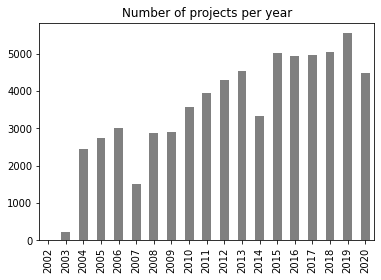

In [14]:
print(cordis['startYear'].value_counts().reindex(range(2002,2021)))
cordis['startYear'].value_counts().reindex(range(2002,2021)).plot(kind='bar',title='Number of projects per year',color='gray')

In [15]:
cordis['startYear'].value_counts().mean()

3223.9523809523807

H2020    32139
FP7      25618
FP6       9946
Name: frameworkProgramme, dtype: int64


<AxesSubplot:title={'center':'Number of projects per FP'}>

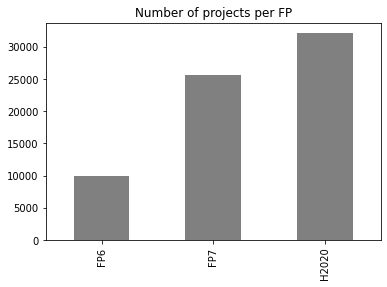

In [16]:
print(cordis['frameworkProgramme'].value_counts())
cordis['frameworkProgramme'].value_counts().reindex(['FP6','FP7','H2020']).plot(kind='bar',title='Number of projects per FP',color='gray')

### EC Max contribution

In [17]:
print('Mean contribution per project: ',cordis['ecMaxContribution'].mean())
print('Mean contribution per year: ',cordis.groupby('startYear')['ecMaxContribution'].sum().mean())

Mean contribution per project:  1856392.7889873683
Mean contribution per year:  5948412893.855257


Total contribution per year:
startYear
2002             NaN
2003    4.967262e+08
2004    5.285175e+09
2005    4.255719e+09
2006    6.091726e+09
2007    2.098851e+09
2008    5.566903e+09
2009    4.908517e+09
2010    6.127859e+09
2011    6.820999e+09
2012    7.628495e+09
2013    8.813757e+09
2014    6.154620e+09
2015    9.236820e+09
2016    8.821270e+09
2017    8.664734e+09
2018    8.435562e+09
2019    1.051616e+10
2020    1.094690e+10
Name: ecMaxContribution, dtype: float64


<AxesSubplot:title={'center':'Total contributions (yearly)'}, xlabel='startYear'>

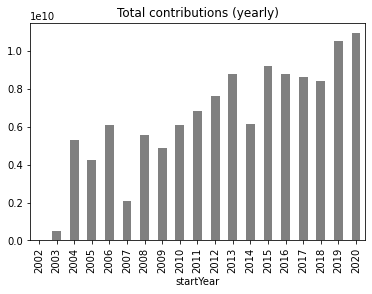

In [18]:
# Total contribution per year
print('Total contribution per year:')
print(cordis.groupby('startYear')['ecMaxContribution'].sum().reindex(range(2002,2021)))
cordis.groupby('startYear')['ecMaxContribution'].sum().reindex(range(2002,2021)).plot(kind='bar',title='Total contributions (yearly)',color='gray')

Total contribution per FP:
frameworkProgramme
FP6      1.780911e+10
FP7      4.539674e+10
H2020    6.171083e+10
Name: ecMaxContribution, dtype: float64


<AxesSubplot:title={'center':'Total contributions per FP'}, xlabel='frameworkProgramme'>

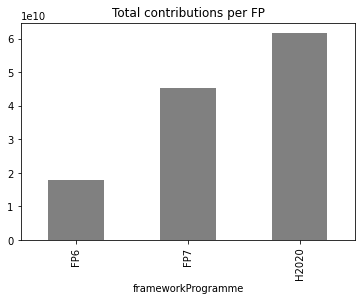

In [19]:
# Total contribution per FP
print('Total contribution per FP:')
print(cordis.groupby('frameworkProgramme')['ecMaxContribution'].sum())
cordis.groupby('frameworkProgramme')['ecMaxContribution'].sum().plot(kind='bar',title='Total contributions per FP',color='gray')

### Coordinator country

In [20]:
print('Number of coordinator countries: ',len(cordis['coordinatorCountry'].value_counts()))
cordis['coordinatorCountry'].value_counts()

Number of coordinator countries:  48


UK    11918
DE     8096
FR     7049
ES     7018
IT     5739
NL     4522
BE     2660
CH     2563
SE     2002
AT     1833
DK     1798
IL     1740
EL     1634
IE     1377
FI     1169
NO     1112
PT     1071
PL      736
TR      548
HU      522
CZ      351
SI      264
EE      250
CY      240
RO      200
IS      184
BG      152
SK      140
LT      123
LU      122
RS      107
HR      100
LV       87
MT       64
RU       48
UA       45
MK       22
BA       19
AM       16
ME       15
MD       15
FO       11
GE        7
AZ        4
AL        4
BY        3
LI        2
MC        1
Name: coordinatorCountry, dtype: int64

### Objective

In [21]:
cordis.objective.isnull().sum()

157

Average abstract narration length:  1800.691510846919
startYear
2002            NaN
2003    1787.862245
2004    1798.506926
2005    1781.679039
2006    1767.250083
2007    1722.994059
2008    1771.235846
2009    1767.434888
2010    1782.089032
2011    1801.572190
2012    1816.084301
2013    1826.290152
2014    1801.705741
2015    1814.270303
2016    1830.978766
2017    1828.216412
2018    1838.167227
2019    1832.725748
2020    1843.384238
Name: objective, dtype: float64


<AxesSubplot:title={'center':'Average objective length (yearly)'}, xlabel='startYear'>

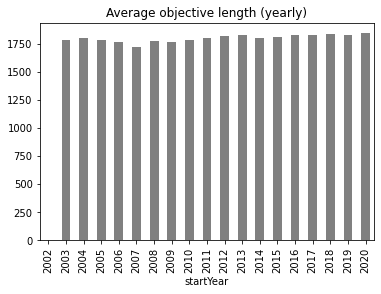

In [22]:
print('Average abstract narration length: ',cordis.groupby('startYear').objective.apply(lambda x: x.str.len().mean()).reindex(range(2002,2021)).mean())
print(cordis.groupby('startYear').objective.apply(lambda x: x.str.len().mean()).reindex(range(2002,2021)))
cordis.groupby('startYear').objective.apply(lambda x: x.str.len().mean()).reindex(range(2002,2021)).plot(kind='bar',title='Average objective length (yearly)',color='gray')